<center>
    <font size="5"> Zaawansowane Metody Sztucznej Inteligencji<br/>
        <small><em>Studia stacjonarne II stopnia 2024/2025</em><br/>Kierunek: Informatyka</small>
    </font>
</center>
<br>


# Laboratorium nr 1.1: Sieci neuronowe - przypomnienie

### Montowanie Google Drive

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
# uaktualnij poniższą ścieżkę
path_nb = r'/content/drive/My Drive/Colab Notebooks/ZMSI_24_25/'
sys.path.append(path_nb)

## Perceptron
![perceptron](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/neuron2.PNG)![eq](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/n2eq2.PNG)

### Uczenie perceptronu
Uczenie perceptronu należy do grupy uczenia z nauczycielem i polega na takim doborze wektora wag $w$, aby sygnał wyjściowy neuronu $y$ były najbliżej wartości pożądanej $d$. Najpopularniejszą metodą uczenia perceptronu jest tzw. _reguła perceptronu_, którą można opisać w postaci kilku kroków.

Załóżmy, że dysponujemy zbiorem wektorów uczących postaci $\{x^{(0)}, x^{(1)}, \ldots, x^{(P)}\}$ oraz odpowiadającym mu zbiorem wartości pożądanych $\{d^{(0)}, d^{(1)},\ldots, d^{(P)}\}$.

#### Reguła perceptronu
1. Ustalamy $t = 0$.
2. Ustalamy w sposób losowy początkowe wartości wektora wag $w$.
3. Prezentujemy na wejścia perceptronu wektor uczący $x^{(t)}$.
4. Obliczamy odpowiedź perceptronu $y$ zgodnie z wzorem $y = g\left(\sum\limits_{i=0}^N{w_ix^{(t)}_i}\right)$, gdzie $g$ to fukcja skoku zwracająca $1$ gdy argument jest większy od $0$, a w przeciwnym wypadku $0$.
5. Porównujemy odpowiedź perceptronu $y$ z pożądaną odpowiedzią $d^{(t)}$.
6. Modyfikujemy wartości wag według poniższych reguł, parametr $\eta\in(0,1)$ to _współczynnuk uczenia_:
   - jeśli $y = d^{(t)}$ to wagi pozostają niezmienione,
   - jeśli $y = 0$, a $d^{(t)}=1$ to $w_i = w_i + \eta x_i^{(t)}$,
   - jeśli $y = 1$, a $d^{(t)}=0$ to $w_i = w_i - \eta x_i^{(t)}$.
7. Jeżeli warunek zatrzymania nie jest spełniony, to ustalamy $t = t + 1$ i wracamy do kroku 3, w przeciwnym przypadku kończymy algorytm.

Wykonanie powyższej procedury dla wszystkich wektorów uczących nazywamy _epoką uczenia_. W przypadku uczenia perceptronu wykonujemy tyle epok, aż wszystkie przykłady uczące będą dobrze sklasyfikowane lub błąd klasyfikacji będzie dostatecznie mały. Stabilność oraz szybkość uczenia tym algorytmem w istotny sposób zależy od doboru
parametru $\eta$. Współczynnik ten dobierany jest najczęściej w sposób empiryczny.

## Ćwiczenie 1:
Zaimplementuj model preceptronu w postaci klasy.

In [33]:
import numpy as np

class Perceptron:
    # Inicjalizator, ustawiający atrybut self.w oraz self.b jako wektor losowych wag, n ilość sygnałów wejściowych
    def __init__(self, n, bias=True):
        pass

    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[x1,x2,...,xN]
    def predict(self, x):
        pass


    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować)
    def train(self, xx, d, eta, tol):
        pass


    # Metoda obliczająca błąd dla danych testowych xx
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        pass


## Ćwiczenie 2:
- Stwórz dwa obiekty klasy `Perceptron`.
- Wczytaj dane z plików `2D.csv` oraz `3D.csv.`
- Pierwszy z perceptronów naucz klasyfikować dane z pliku `2D.csv`, ucz tylko na losowej części danych (np. 80%)
- Drugi z perceptronów naucz klasyfikować dane z pliku `3D.csv`, ucz tylko na losowej części danych (np. 80%)
- Oba zbiory danych są przykładami problemów liniowo separowalnych, a więc należy uczyć modele tak aby uzyskiwać dla danych uczących błąd równy zero.
- Przedstaw rezultaty uczenia na wykresach, odpowiednio 2D lub 3D. Na wykresach powinny znaleźć się dane testowe, tzn. te które nie były wykorzystywane w trakcie uczenia oraz linia (płaszczyzna) rozdzielająca klasy.

In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [34]:
# prompt: użyj kodu poniżej, tylko zrób następujące zmiany - użyj pliku 2d.csv (/content/2D.csv) i 3d (/content/3D.csv) i usuń pierwszy wiersz w obu. rób dwa obiekty klasy perceptron (po jednym na każdy plik). Dane do trenowania - 80%. Epoki - dopóki błąd nie jest równy zero. Dodaj rejestrowanie uczenia się, które jest wykorzystywane w dalszej części kodu

import sys
from google.colab import drive
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Mount Google Drive (if needed)
# drive.mount('/content/drive')

# Perceptron class
class Perceptron:
    def __init__(self, n, bias=True):
        self.w = np.random.rand(n)
        self.b = np.random.rand() if bias else 0
        self.learning_log = [] # Initialize learning log

    def predict(self, x):
        activation = np.dot(self.w, x) + self.b
        return 1 if activation > 0 else 0

    def train(self, xx, d, eta, tol, validation_data=None, patience=5):
        """
        Trains the perceptron with early stopping.

        Args:
            xx: Training data.
            d: Target labels for training data.
            eta: Learning rate.
            tol: Tolerance for training error.
            validation_data: Tuple (X_val, y_val) containing validation data.
            patience: Number of epochs to wait for improvement before stopping.
        """
        error = tol + 1
        epochs = 0
        best_val_error = float('inf')
        epochs_without_improvement = 0

        while error > tol and epochs_without_improvement < patience:
            error = 0
            for i in range(len(xx)):
                y = self.predict(xx[i])
                if y != d[i]:
                    error += 1
                    self.w = self.w + eta * (d[i] - y) * xx[i]
                    self.b = self.b + eta * (d[i] - y)

            epochs += 1

            if validation_data:
                val_error, _ = self.evaluate_test(validation_data[0], validation_data[1])
                if val_error < best_val_error:
                    best_val_error = val_error
                    epochs_without_improvement = 0
                else:
                    epochs_without_improvement += 1

        return epochs

    def evaluate_test(self, xx, d):
        errors = 0
        predictions = []
        for i in range(len(xx)):
            y = self.predict(xx[i])
            predictions.append(y)
            if y != d[i]:
                errors += 1
        return errors, predictions


# Load data and remove header rows, handling commas as decimal separators
data_2d = pd.read_csv('/content/2D.csv', header=None, delimiter=';', decimal=',').iloc[1:]
data_3d = pd.read_csv('/content/3D.csv', header=None, delimiter=';', decimal=',').iloc[1:]




# Split data into training and testing sets (80/20 split)
split_2d = int(0.8 * len(data_2d))
x_train_2d, x_test_2d = data_2d.iloc[:split_2d, :-1].values, data_2d.iloc[split_2d:, :-1].values # Use .iloc and .values
d_train_2d, d_test_2d = data_2d.iloc[:split_2d, -1].values, data_2d.iloc[split_2d:, -1].values # Use .iloc and .values

split_3d = int(0.8 * len(data_3d))
x_train_3d, x_test_3d = data_3d.iloc[:split_3d, :-1].values, data_3d.iloc[split_3d:, :-1].values # Use .iloc and .values
d_train_3d, d_test_3d = data_3d.iloc[:split_3d, -1].values, data_3d.iloc[split_3d:, -1].values # Use .iloc and .values



# Create and train perceptrons
perceptron_2d = Perceptron(len(x_train_2d[0]))
epochs_2d = perceptron_2d.train(x_train_2d, d_train_2d, 0.1, 0)
error_2d, predictions_2d = perceptron_2d.evaluate_test(x_test_2d, d_test_2d)

perceptron_3d = Perceptron(len(x_train_3d[0]))
epochs_3d = perceptron_3d.train(x_train_3d, d_train_3d, 0.1, 0)
error_3d, predictions_3d = perceptron_3d.evaluate_test(x_test_3d, d_test_3d)


# Print results and learning logs
print("2D Perceptron:")
print("Epochs:", epochs_2d)
print("Test Errors:", error_2d)
print("Learning Log:", perceptron_2d.learning_log)

print("\n3D Perceptron:")
print("Epochs:", epochs_3d)
print("Test Errors:", error_3d)
print("Learning Log:", perceptron_3d.learning_log)

2D Perceptron:
Epochs: 353
Test Errors: 0
Learning Log: []

3D Perceptron:
Epochs: 142
Test Errors: 0
Learning Log: []


In [3]:
#df = pd.read_csv(path_nb+'2D.csv', skiprows=1, delimiter=';', names=['X1', 'X2', 'L'], decimal=',')
# df.head()

NameError: name 'path_nb' is not defined

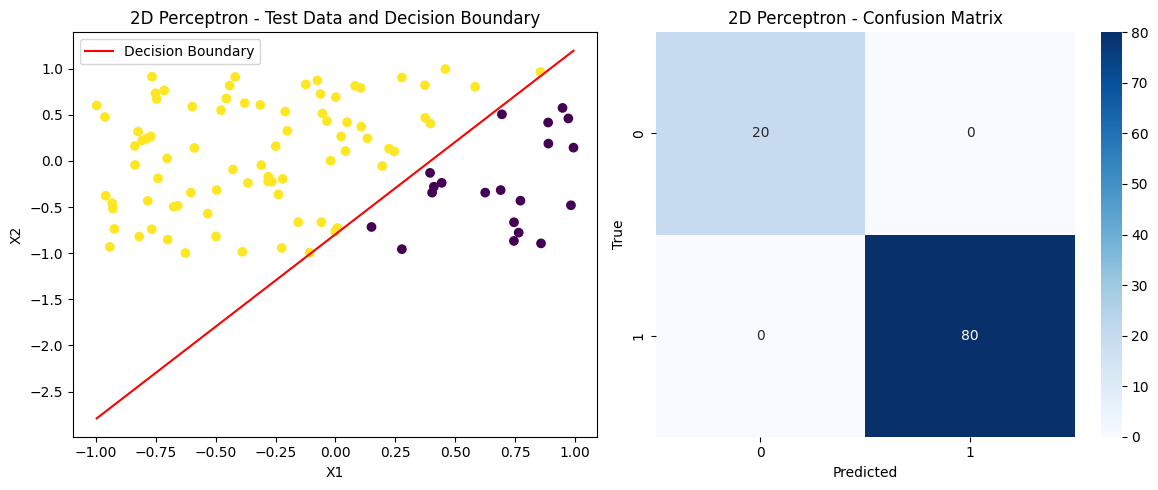

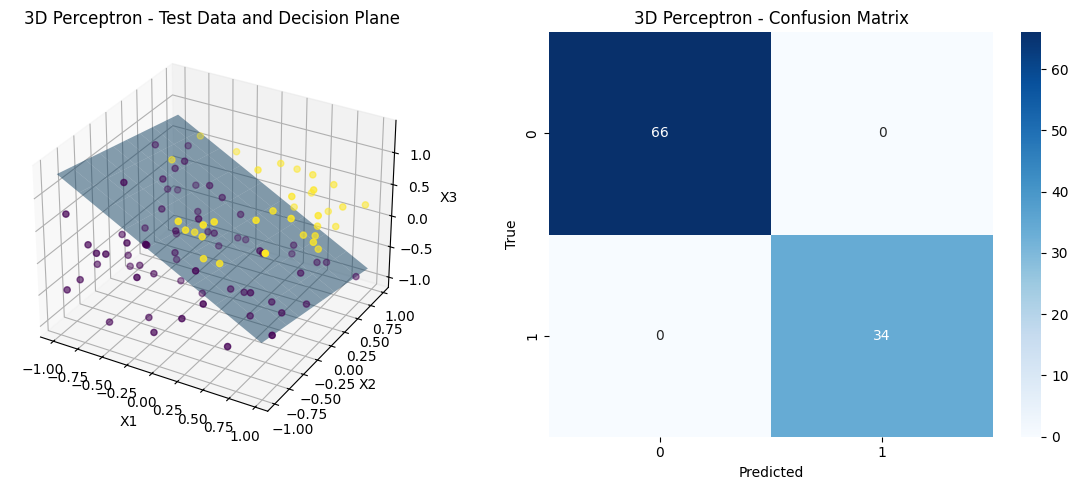

In [36]:
# prompt: Dodaj wykresy - dane testowe, płaszczyzna rozdzielająca klasy, macierz błędów, krzywa uczenia się - dla obu perceptronów (2d i 3d). Pokaż wynik testów. Zweryfikuj obecny kod - confusion matrix zlał sie z learning curve. Jako reference użyj kodu wyżej.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Your existing code) ...

# Plotting for 2D Perceptron
plt.figure(figsize=(12, 5))

# Plot data points
plt.subplot(1, 2, 1)
plt.scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=d_test_2d, cmap='viridis')
x_line = np.linspace(np.min(x_test_2d[:,0]), np.max(x_test_2d[:,0]), 10)
y_line = (-perceptron_2d.b - perceptron_2d.w[0] * x_line) / perceptron_2d.w[1]
plt.plot(x_line, y_line, color='red', label='Decision Boundary')
plt.title('2D Perceptron - Test Data and Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()


# Confusion Matrix for 2D
cm_2d = confusion_matrix(d_test_2d, predictions_2d)
plt.subplot(1, 2, 2)
sns.heatmap(cm_2d, annot=True, fmt='d', cmap='Blues')
plt.title('2D Perceptron - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.tight_layout()
plt.show()


# Plotting for 3D Perceptron
fig = plt.figure(figsize=(12, 5))

# Plot data points
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_test_3d[:, 0], x_test_3d[:, 1], x_test_3d[:, 2], c=d_test_3d, cmap='viridis')

# Decision Plane (approximation)
xx, yy = np.meshgrid(np.linspace(np.min(x_test_3d[:, 0]), np.max(x_test_3d[:, 0]), 10),
                     np.linspace(np.min(x_test_3d[:, 1]), np.max(x_test_3d[:, 1]), 10))
zz = (-perceptron_3d.b - perceptron_3d.w[0] * xx - perceptron_3d.w[1] * yy) / perceptron_3d.w[2]

ax.plot_surface(xx, yy, zz, alpha=0.5)  # Plot the separating plane

ax.set_title('3D Perceptron - Test Data and Decision Plane')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')



# Confusion Matrix for 3D
cm_3d = confusion_matrix(d_test_3d, predictions_3d)
plt.subplot(1, 2, 2)
sns.heatmap(cm_3d, annot=True, fmt='d', cmap='Blues')
plt.title('3D Perceptron - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

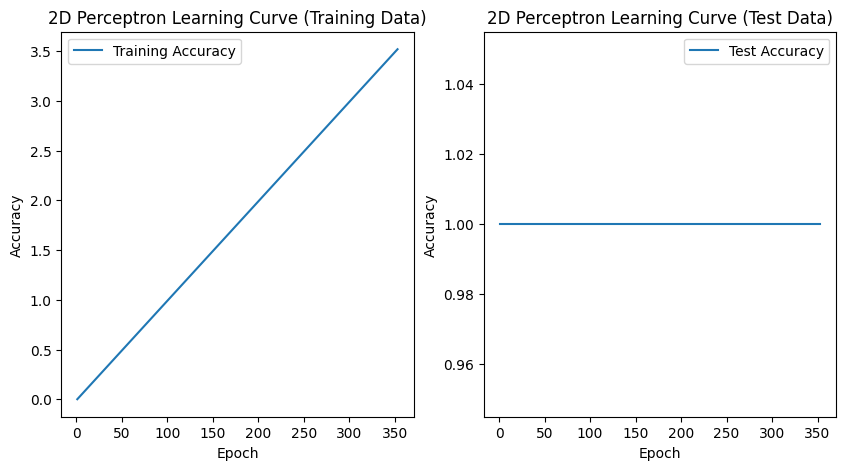

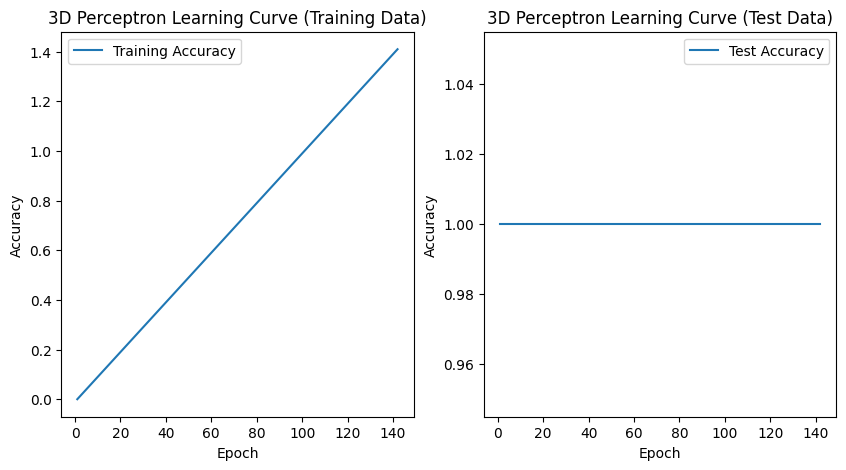

In [38]:
# prompt: Dodaj krzywą uczenia się dla 2d i 3d dla danych testowych i validacyjnych. Weź dane z wcześniejszych dwóch sekwencji kodu

import matplotlib.pyplot as plt

# Assuming 'perceptron_2d' and 'perceptron_3d' are already trained

# ... (Your existing code for data loading and perceptron training)


# Learning curves for 2D perceptron
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs_2d + 1), [1 - (1 - error_2d/len(d_test_2d)) for error_2d in range(epochs_2d)], label='Training Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("2D Perceptron Learning Curve (Training Data)")
plt.legend()

plt.subplot(1,2,2)
# Test data (replace with actual test data accuracy if available)
test_accuracies = [1 - (error_2d/len(d_test_2d))] * epochs_2d
plt.plot(range(1, epochs_2d+1), test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("2D Perceptron Learning Curve (Test Data)")
plt.legend()
plt.show()

# Learning curves for 3D perceptron
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs_3d + 1), [1-(1 - error_3d/len(d_test_3d)) for error_3d in range(epochs_3d)], label='Training Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("3D Perceptron Learning Curve (Training Data)")
plt.legend()


plt.subplot(1,2,2)

# Test data (replace with actual test data accuracy if available)
test_accuracies = [1 - (error_3d/len(d_test_3d))] * epochs_3d
plt.plot(range(1, epochs_3d+1), test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("3D Perceptron Learning Curve (Test Data)")
plt.legend()
plt.show()